In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !unzip /content/drive/MyDrive/HW2CVcourse/Classification_data.zip -d /content/drive/MyDrive/HW2CVcourse/

In [2]:
!git clone https://github.com/OlegBEZb/CV_advanced_course.git

Cloning into 'CV_advanced_course'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 63 (delta 26), reused 34 (delta 9), pack-reused 0
Unpacking objects: 100% (63/63), 36.25 MiB | 4.38 MiB/s, done.


In [3]:
import sys
sys.path.append("/content/CV_advanced_course/HW_2_image_classification")

In [5]:
!python /content/CV_advanced_course/HW_2_image_classification/train.py --train_data_dir /content/drive/MyDrive/HW2CVcourse/Classification_data/train --test_data_dir /content/drive/MyDrive/HW2CVcourse/Classification_data/test --val_size 0.2 --dataset custom --epochs 2 --reduced_num 200

received args
 Namespace(dataset='custom', epochs=2, load_on_fly=False, model='cnn', reduced_num=200, test_data_dir='/content/drive/MyDrive/HW2CVcourse/Classification_data/test', train_data_dir='/content/drive/MyDrive/HW2CVcourse/Classification_data/train', val_size=0.2)
100% 6/6 [03:23<00:00, 33.91s/it]
100% 6/6 [00:05<00:00,  1.15it/s]
100% 6/6 [00:43<00:00,  7.18s/it]
>>> Training Start >>>
  0% 0/2 [00:00<?, ?it/s]
100% 15/15 [00:03<00:00,  4.65it/s]
              precision    recall  f1-score   support

           0       0.22      0.05      0.08        40
           1       0.17      0.95      0.28        40
           2       0.00      0.00      0.00        40
           3       0.00      0.00      0.00        40
           4       0.00      0.00      0.00        40
           5       0.00      0.00      0.00        40

    accuracy                           0.17       240
   macro avg       0.06      0.17      0.06       240
weighted avg       0.06      0.17      0.06       240

reduce epochs for debugging  
remove tqdm.notebook for cli launch  
parametrize the number of epochs

In [9]:
!python -m torch.utils.bottleneck /content/CV_advanced_course/HW_2_image_classification/train.py --train_data_dir /content/drive/MyDrive/HW2CVcourse/Classification_data/train --test_data_dir /content/drive/MyDrive/HW2CVcourse/Classification_data/test --val_size 0.2 --dataset custom --epochs 2 --reduced_num 100

`bottleneck` is a tool that can be used as an initial step for debugging
bottlenecks in your program.

It summarizes runs of your script with the Python profiler and PyTorch's
autograd profiler. Because your script will be profiled, please ensure that it
exits in a finite amount of time.

For more complicated uses of the profilers, please see
https://docs.python.org/3/library/profile.html and
https://pytorch.org/docs/master/autograd.html#profiler for more information.
Running environment analysis...
Running your script with cProfile
received args
 Namespace(dataset='custom', epochs=2, load_on_fly=False, model='cnn', reduced_num=100, test_data_dir='/content/drive/MyDrive/HW2CVcourse/Classification_data/test', train_data_dir='/content/drive/MyDrive/HW2CVcourse/Classification_data/train', val_size=0.2)
100% 6/6 [00:07<00:00,  1.30s/it]
100% 6/6 [00:01<00:00,  5.05it/s]
100% 6/6 [00:02<00:00,  2.47it/s]
>>> Training Start >>>
  0% 0/2 [00:00<?, ?it/s]
100% 8/8 [00:02<00:00,  3.52it/s]
    

In [10]:
!python -m torch.utils.bottleneck /content/CV_advanced_course/HW_2_image_classification/train.py --train_data_dir /content/drive/MyDrive/HW2CVcourse/Classification_data/train --test_data_dir /content/drive/MyDrive/HW2CVcourse/Classification_data/test --val_size 0.2 --dataset custom --epochs 2 --reduced_num 100 --load_on_fly

`bottleneck` is a tool that can be used as an initial step for debugging
bottlenecks in your program.

It summarizes runs of your script with the Python profiler and PyTorch's
autograd profiler. Because your script will be profiled, please ensure that it
exits in a finite amount of time.

For more complicated uses of the profilers, please see
https://docs.python.org/3/library/profile.html and
https://pytorch.org/docs/master/autograd.html#profiler for more information.
Running environment analysis...
Running your script with cProfile
received args
 Namespace(dataset='custom', epochs=2, load_on_fly=True, model='cnn', reduced_num=100, test_data_dir='/content/drive/MyDrive/HW2CVcourse/Classification_data/test', train_data_dir='/content/drive/MyDrive/HW2CVcourse/Classification_data/train', val_size=0.2)
100% 6/6 [00:00<00:00, 21.98it/s]
100% 6/6 [00:00<00:00, 27.50it/s]
100% 6/6 [00:00<00:00, 104.18it/s]
>>> Training Start >>>
  0% 0/2 [00:00<?, ?it/s]
100% 8/8 [00:04<00:00,  1.96it/s]
    

# Imports

In [ ]:
import os
from tqdm.notebook import tqdm

import cv2
from PIL import Image

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Data reading

In [ ]:
COLAB = True

if COLAB:
    data_path = '/content/drive/MyDrive/HW2CVcourse'
else:
    data_path = '.'

train_data_dir = os.path.join(data_path, 'Classification_data/train')
test_data_dir = os.path.join(data_path, 'Classification_data/test')

img_width, img_height = 150, 150

classes = [c for c in os.listdir(train_data_dir) if not c.startswith('.')]
classes

['forest', 'glacier', 'mountain', 'sea', 'street', 'buildings']

forest 2271


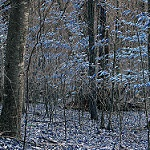

glacier 2404


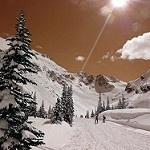

mountain 2512


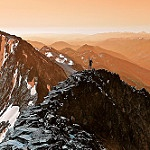

sea 2274


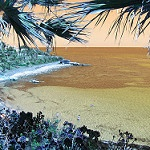

street 2382


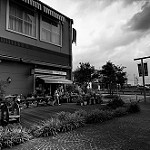

buildings 2191


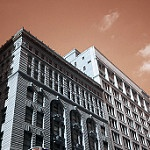

In [ ]:
image_name_dict = {}
for c in classes:
    folder = os.path.join(train_data_dir, c)
    image_names = os.listdir(folder)
    print(c, len(image_names))
    image_name_dict[c] = image_names
    image = cv2.imread(os.path.join(train_data_dir, c, image_names[0]))
    display(Image.fromarray(image))

In [ ]:
total = 0
for k, v in image_name_dict.items():
    class_items_num = len(v)
    print(k, class_items_num)
    total += class_items_num
print('total', total)

forest 2271
glacier 2404
mountain 2512
sea 2274
street 2382
buildings 2191
total 14034


# Classification

## Utils

In [ ]:
def eval_clf(y_test, y_pred, disp=0):
    from sklearn.metrics import (f1_score, classification_report, confusion_matrix,
                                 ConfusionMatrixDisplay)
    
    if isinstance(y_test, (pd.core.frame.DataFrame, pd.core.series.Series)):
        y_test = y_test.astype(str)
    if isinstance(y_pred, (pd.core.frame.DataFrame, pd.core.series.Series)):
        y_pred = y_pred.astype(str)
    clf_report = classification_report(y_test,
                                       y_pred, zero_division=0)

    print(clf_report)

    if disp:
        test_labels = set(np.unique(y_test))
        pred_labels = set(np.unique(y_pred))
        labels = sorted(test_labels.union(pred_labels))

        conf_matrix = confusion_matrix(y_test,
                                    y_pred)
        disp = ConfusionMatrixDisplay(conf_matrix, display_labels=labels)
        fig, ax = plt.subplots(figsize=(14, 6))
        ax.grid(False)
        disp.plot(ax=ax)

    return round(f1_score(y_test, y_pred, average='micro'), 2)

## Classic

### Features

#### Load

In [ ]:
X_train_list = []
y_train = []
i = 0
for c in tqdm(classes, total=len(classes)):
    folder = os.path.join(train_data_dir, c)
    image_names = os.listdir(folder)
    for img_name in tqdm(image_names, total=len(image_names)):
        image = cv2.imread(os.path.join(train_data_dir, c, img_name))
        if image.shape == (150, 150, 3):
            X_train_list.append(image)
            y_train.append(c)
            i += 1
        else:
            print(os.path.join(train_data_dir, c, img_name), 'was not processed with shape', image.shape)

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/2271 [00:00<?, ?it/s]

./Classification_data/train/forest/14609.jpg was not processed with shape (115, 150, 3)
./Classification_data/train/forest/12108.jpg was not processed with shape (108, 150, 3)
./Classification_data/train/forest/5483.jpg was not processed with shape (136, 150, 3)
./Classification_data/train/forest/5643.jpg was not processed with shape (108, 150, 3)
./Classification_data/train/forest/15776.jpg was not processed with shape (135, 150, 3)
./Classification_data/train/forest/14315.jpg was not processed with shape (133, 150, 3)
./Classification_data/train/forest/7174.jpg was not processed with shape (113, 150, 3)
./Classification_data/train/forest/1004.jpg was not processed with shape (113, 150, 3)


  0%|          | 0/2191 [00:00<?, ?it/s]

./Classification_data/train/buildings/5358.jpg was not processed with shape (124, 150, 3)


  0%|          | 0/2404 [00:00<?, ?it/s]

./Classification_data/train/glacier/5135.jpg was not processed with shape (111, 150, 3)
./Classification_data/train/glacier/1740.jpg was not processed with shape (134, 150, 3)
./Classification_data/train/glacier/17528.jpg was not processed with shape (142, 150, 3)
./Classification_data/train/glacier/15103.jpg was not processed with shape (149, 150, 3)
./Classification_data/train/glacier/2837.jpg was not processed with shape (76, 150, 3)
./Classification_data/train/glacier/12634.jpg was not processed with shape (111, 150, 3)
./Classification_data/train/glacier/17611.jpg was not processed with shape (123, 150, 3)
./Classification_data/train/glacier/11110.jpg was not processed with shape (105, 150, 3)
./Classification_data/train/glacier/18110.jpg was not processed with shape (102, 150, 3)
./Classification_data/train/glacier/16472.jpg was not processed with shape (143, 150, 3)
./Classification_data/train/glacier/16710.jpg was not processed with shape (146, 150, 3)
./Classification_data/tra

  0%|          | 0/2382 [00:00<?, ?it/s]

./Classification_data/train/street/13747.jpg was not processed with shape (113, 150, 3)


  0%|          | 0/2512 [00:00<?, ?it/s]

./Classification_data/train/mountain/8163.jpg was not processed with shape (147, 150, 3)
./Classification_data/train/mountain/16971.jpg was not processed with shape (103, 150, 3)
./Classification_data/train/mountain/9286.jpg was not processed with shape (131, 150, 3)
./Classification_data/train/mountain/13200.jpg was not processed with shape (135, 150, 3)
./Classification_data/train/mountain/16041.jpg was not processed with shape (144, 150, 3)
./Classification_data/train/mountain/4513.jpg was not processed with shape (100, 150, 3)
./Classification_data/train/mountain/13656.jpg was not processed with shape (123, 150, 3)
./Classification_data/train/mountain/17021.jpg was not processed with shape (136, 150, 3)
./Classification_data/train/mountain/14462.jpg was not processed with shape (113, 150, 3)
./Classification_data/train/mountain/7400.jpg was not processed with shape (81, 150, 3)
./Classification_data/train/mountain/5171.jpg was not processed with shape (143, 150, 3)
./Classification

  0%|          | 0/2274 [00:00<?, ?it/s]

./Classification_data/train/sea/5584.jpg was not processed with shape (113, 150, 3)
./Classification_data/train/sea/19551.jpg was not processed with shape (113, 150, 3)
./Classification_data/train/sea/341.jpg was not processed with shape (113, 150, 3)
./Classification_data/train/sea/357.jpg was not processed with shape (140, 150, 3)


In [ ]:
len(X_train_list)

13986

#### Split

In [ ]:
X_train_list, X_val_list, y_train, y_val = train_test_split(X_train_list,
                                                            y_train,
                                                            stratify=y_train,
                                                            random_state=42,
                                                            test_size=0.2)

#### Plain vector

In [ ]:
X_train_plain = np.stack(X_train_list)
X_train_plain.shape

(11188, 150, 150, 3)

In [ ]:
X_train_plain = np.reshape(X_train_plain, (X_train_plain.shape[0], -1))
X_train_plain.shape

(11188, 67500)

In [ ]:
X_val_plain = np.stack(X_val_list)
X_val_plain = np.reshape(X_val_plain, (X_val_plain.shape[0], -1))
X_val_plain.shape

(2798, 67500)

#### Histogram
https://pyimagesearch.com/2016/08/08/k-nn-classifier-for-image-classification/

In [ ]:
def extract_color_histogram(image, bins=(8, 8, 8)):
    # extract a 3D color histogram from the HSV color space using
    # the supplied number of `bins` per channel
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins,
    [0, 180, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    # return the flattened histogram as the feature vector
    return hist.flatten()

In [ ]:
extract_color_histogram(image).shape

(512,)

In [ ]:
X_train_hist = [
    extract_color_histogram(img)
    for img in tqdm(X_train_list, total=len(X_train_list))
]

X_train_hist = np.stack(X_train_hist)
X_train_hist.shape

  0%|          | 0/11188 [00:00<?, ?it/s]

(11188, 512)

In [ ]:
X_val_hist = [
    extract_color_histogram(img)
    for img in tqdm(X_val_list, total=len(X_val_list))
]

X_val_hist = np.stack(X_val_hist)
X_val_hist.shape

  0%|          | 0/2798 [00:00<?, ?it/s]

(2798, 512)

### KNN
https://medium.com/swlh/image-classification-with-k-nearest-neighbours-51b3a289280
Play with params? neighbours, metric

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#### Plain

              precision    recall  f1-score   support

   buildings       0.93      0.50      0.65      1732
      forest       0.78      0.74      0.76      1805
     glacier       0.61      0.66      0.64      1925
    mountain       0.46      0.83      0.59      1975
         sea       0.48      0.64      0.55      1846
      street       0.96      0.24      0.38      1905

    accuracy                           0.60     11188
   macro avg       0.70      0.60      0.59     11188
weighted avg       0.70      0.60      0.59     11188



0.6

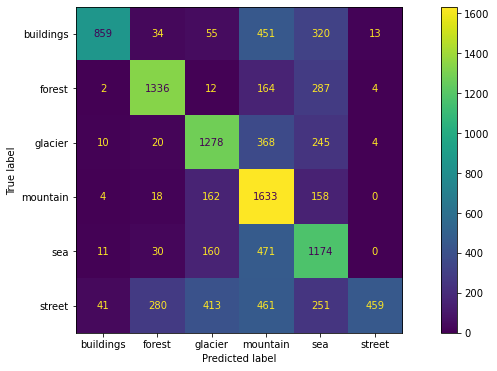

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_plain, y_train)
y_train_pred = neigh.predict(X_train_plain)
eval_clf(y_test=y_train, y_pred=y_train_pred)

              precision    recall  f1-score   support

   buildings       0.58      0.08      0.14       458
      forest       0.63      0.46      0.53       458
     glacier       0.42      0.41      0.41       462
    mountain       0.35      0.72      0.47       520
         sea       0.22      0.42      0.29       424
      street       0.84      0.13      0.23       476

    accuracy                           0.38      2798
   macro avg       0.51      0.37      0.35      2798
weighted avg       0.51      0.38      0.35      2798



0.38

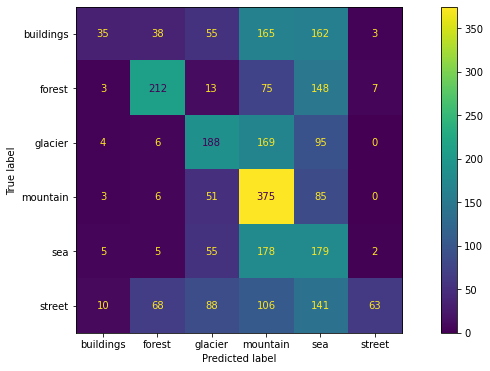

In [ ]:
y_val_pred = neigh.predict(X_val_plain)
eval_clf(y_test=y_val, y_pred=y_val_pred)

reference buildings


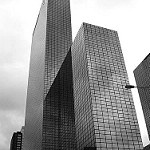

dist 17249.96921736384 class sea


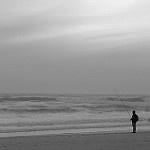

dist 17320.570660344885 class buildings


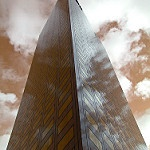

dist 17420.37413490307 class mountain


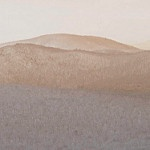

dist 17425.952513420896 class mountain


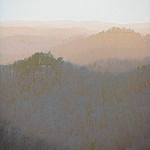

dist 17467.633211170883 class mountain


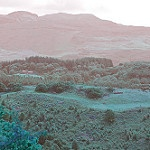

In [ ]:
val_idx = 10
reference = X_val_plain[[val_idx]]
neigh_dist, neigh_ind = neigh.kneighbors(reference, n_neighbors=5)
neigh_dist = neigh_dist[0]
neigh_ind = neigh_ind[0]

print('reference', y_val[val_idx])
display(Image.fromarray(X_val_list[val_idx]))
for idx, dist in zip(neigh_ind, neigh_dist):
    print('dist', dist, 'class', y_train[idx])
    display(Image.fromarray(X_train_list[idx]))

#### Hist

              precision    recall  f1-score   support

   buildings       0.50      0.79      0.62      1732
      forest       0.78      0.92      0.84      1805
     glacier       0.62      0.77      0.69      1925
    mountain       0.80      0.51      0.62      1975
         sea       0.79      0.49      0.60      1846
      street       0.78      0.64      0.70      1905

    accuracy                           0.68     11188
   macro avg       0.71      0.69      0.68     11188
weighted avg       0.72      0.68      0.68     11188



0.68

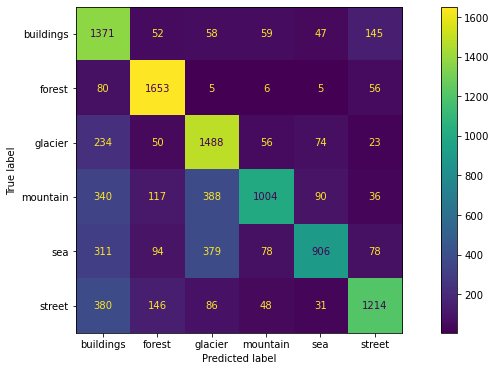

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_hist, y_train)
y_train_pred = neigh.predict(X_train_hist)
eval_clf(y_test=y_train, y_pred=y_train_pred)

              precision    recall  f1-score   support

   buildings       0.29      0.45      0.35       458
      forest       0.69      0.85      0.76       458
     glacier       0.43      0.56      0.49       462
    mountain       0.47      0.24      0.32       520
         sea       0.42      0.26      0.32       424
      street       0.53      0.43      0.47       476

    accuracy                           0.46      2798
   macro avg       0.47      0.47      0.45      2798
weighted avg       0.47      0.46      0.45      2798



0.46

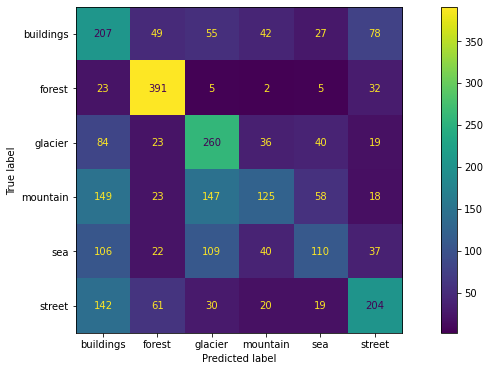

In [ ]:
y_val_pred = neigh.predict(X_val_hist)
eval_clf(y_test=y_val, y_pred=y_val_pred)

reference glacier


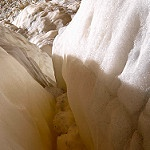

dist 0.5834561769247257 class mountain


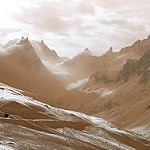

dist 0.6468423733799108 class mountain


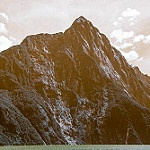

dist 0.6650135634767171 class sea


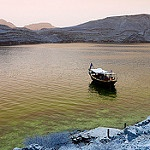

dist 0.7379049724841951 class glacier


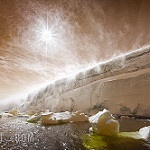

dist 0.750292204519228 class glacier


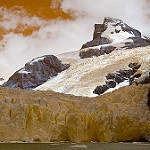

In [ ]:
val_idx = 200
reference = X_val_hist[[val_idx]]
neigh_dist, neigh_ind = neigh.kneighbors(reference, n_neighbors=5)
neigh_dist = neigh_dist[0]
neigh_ind = neigh_ind[0]

print('reference', y_val[val_idx])
display(Image.fromarray(X_val_list[val_idx]))
for idx, dist in zip(neigh_ind, neigh_dist):
    print('dist', dist, 'class', y_train[idx])
    display(Image.fromarray(X_train_list[idx]))

### SVM

In [ ]:
from sklearn.svm import SVC

#### Plain
infinite

In [ ]:
# svc = SVC()
# svc.fit(X_train_plain, y_train)
# y_train_pred = svc.predict(X_train_plain)
# eval_clf(y_test=y_train, y_pred=y_train_pred)

In [ ]:
# y_val_pred = svc.predict(X_val_plain)
# eval_clf(y_test=y_val, y_pred=y_val_pred)

#### Hist

              precision    recall  f1-score   support

   buildings       0.72      0.56      0.63      1732
      forest       0.93      0.87      0.90      1805
     glacier       0.69      0.80      0.74      1925
    mountain       0.73      0.70      0.72      1975
         sea       0.73      0.68      0.70      1846
      street       0.67      0.80      0.73      1905

    accuracy                           0.74     11188
   macro avg       0.74      0.73      0.74     11188
weighted avg       0.74      0.74      0.74     11188



0.74

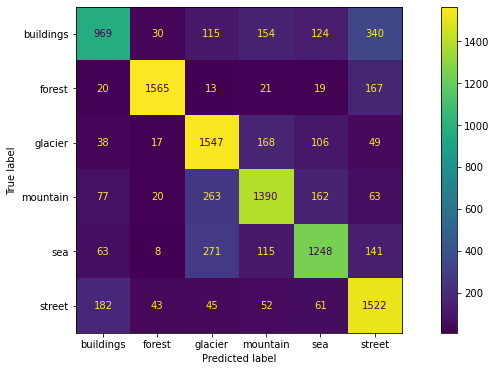

In [ ]:
svc = SVC()
svc.fit(X_train_hist, y_train)
y_train_pred = svc.predict(X_train_hist)
eval_clf(y_test=y_train, y_pred=y_train_pred)

              precision    recall  f1-score   support

   buildings       0.46      0.34      0.39       458
      forest       0.88      0.82      0.85       458
     glacier       0.56      0.68      0.62       462
    mountain       0.59      0.54      0.56       520
         sea       0.48      0.47      0.47       424
      street       0.51      0.62      0.56       476

    accuracy                           0.58      2798
   macro avg       0.58      0.58      0.58      2798
weighted avg       0.58      0.58      0.58      2798



0.58

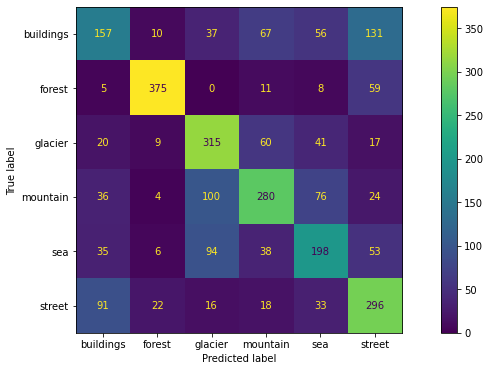

In [ ]:
y_val_pred = svc.predict(X_val_hist)
eval_clf(y_test=y_val, y_pred=y_val_pred)

### Lin

## CNN+MLP with your own architecture

1. Frameworks? Make overview based on some papers/articles
    * TF Lite - optimizations for CPU (for Intel use openVINO)
    * TensorRT - optimizations for specific NVIDIA GPU
    * Torch -> ONNX -> TF Lite
    * NVIDIA Triton and DeepStream for optimized inference https://www.reddit.com/r/computervision/comments/p1xasr/nvidia_deepstream_triton_server_jetson_nano/
2. Wrappers like lightning or catalyst? Вкусовщина, but it's always safer to use pure torch
3. Best practices? Loaders (batch)? 

torch-vision?

https://saptarshidatta.in/2021/06/13/mlp_cnn_cifar100.html

In [ ]:
# !pip3 install --prefix=/opt/intel/ipp ipp-devel
# !pip3 install git+https://github.com/pytorch/accimage

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

In [ ]:
torchvision.get_image_backend()

'PIL'

In [ ]:
# torchvision.set_image_backend('accimage')

In [ ]:
torch.cuda.is_available()

True

In [ ]:
torch.cuda.device_count()

1

In [ ]:
torch.cuda.current_device()

0

In [ ]:
torch.cuda.get_device_name(0)

'Tesla T4'

In [ ]:
# from PIL import Image


# def pil_loader(path: str) -> Image.Image:
#     # open path as file to avoid ResourceWarning (https://github.com/python-pillow/Pillow/issues/835)
#     with open(path, "rb") as f:
#         img = Image.open(f)
#         return img.convert("RGB")


# # TODO: specify the return type
# def accimage_loader(path: str):
#     import accimage

#     try:
#         return accimage.Image(path)
#     except OSError:
#         # Potentially a decoding problem, fall back to PIL.Image
#         return pil_loader(path)

discussion about loading approaches https://tcapelle.github.io/pytorch/fastai/2021/02/26/image_resizing.html

In [ ]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision.io import read_image

import math


class IntelImageDataset(Dataset):
    def __init__(self, img_dir, transform=None, target_transform=None,
                 mode='train', load_on_fly=True):
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        self.load_on_fly = load_on_fly

        self.classes = [c for c in os.listdir(self.img_dir) if not c.startswith('.')]
        self.file_paths = []
        self.img_labels = []
        for c in tqdm(self.classes, total=len(self.classes)):
            folder = os.path.join(self.img_dir, c)
            image_names = os.listdir(folder)
            image_paths = [os.path.join(self.img_dir, c, n) for n in image_names]
            if not load_on_fly:
                image_paths = [read_image(path) for path in image_paths]  # returns torch.ByteTensor
            
            if mode == 'train':
                image_paths = image_paths[: int(0.8*len(image_paths))]
            elif mode == 'val':
                image_paths = image_paths[int(0.8*len(image_paths)):]
            self.file_paths.extend(image_paths)
            self.img_labels.extend([c] * len(image_paths))

        if mode == 'train' and self.target_transform:
            self.target_transform.fit(np.array(self.img_labels))    

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        if self.load_on_fly:
            img_path = self.file_paths[idx]
            # image = pil_loader(img_path)
            image = read_image(img_path)
        else:
            image = self.file_paths[idx]

        label = self.img_labels[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = torch.tensor(self.target_transform.transform([label]))[0]
        return image, label

    def __iter__(self):
        worker_info = torch.utils.data.get_worker_info()
        if worker_info is None:  # single-process data loading, return the full iterator
            iter_start = self.start
            iter_end = self.end
        else:  # in a worker process
            # split workload
            per_worker = int(math.ceil((self.end - self.start) / float(worker_info.num_workers)))
            worker_id = worker_info.id
            iter_start = self.start + worker_id * per_worker
            iter_end = min(iter_start + per_worker, self.end)
        return iter(range(iter_start, iter_end))

In [ ]:
# TODO: check for bottlenecks via https://pytorch.org/docs/stable/bottleneck.html

In [ ]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# le = LabelEncoder()

# load_on_fly = False

# train_dataset = IntelImageDataset(img_dir=train_data_dir, 
#                                   transform=transforms.Resize([img_width, img_height]), 
#                                   target_transform=le, 
#                                   mode='train',
#                                   load_on_fly=load_on_fly)

# val_dataset = IntelImageDataset(img_dir=train_data_dir, 
#                                 transform=transforms.Resize([img_width, img_height]), 
#                                 target_transform=le, 
#                                 mode='val',
#                                 load_on_fly=load_on_fly)

# test_dataset = IntelImageDataset(img_dir=test_data_dir, 
#                                  transform=transforms.Resize([img_width, img_height]), 
#                                  target_transform=train_dataset.target_transform, 
#                                  mode='test',
#                                  load_on_fly=load_on_fly)

# train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2, pin_memory=True)
# val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=True, num_workers=2, pin_memory=True)
# test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2, pin_memory=True)


###########################################################

# ImageFloder function uses for make dataset by passing dir adderess as an argument
# works a bit slower than when all the images are loaded in init. but works great on the fly
# TODO: check why native is faster

# convert data to a normalized torch.FloatTensor
transform = torchvision.transforms.Compose([
    transforms.Resize((img_width, img_height)),
    # transforms.RandomHorizontalFlip(p=0.5), # randomly flip and rotate
    # transforms.ColorJitter(0.3,0.4,0.4,0.2),
    transforms.ToTensor(),
    # transforms.Normalize((0.425, 0.415, 0.405), (0.205, 0.205, 0.205))
    ])

# Augmentation on test images not needed
transform_tests = torchvision.transforms.Compose([
    transforms.Resize((img_width, img_height)),
    transforms.ToTensor(),
    # transforms.Normalize((0.425, 0.415, 0.405), (0.255, 0.245, 0.235))
    ])

from torch.utils.data.sampler import SubsetRandomSampler
# ImageFloder function uses for make dataset by passing dir adderess as an argument
train_dataset = torchvision.datasets.ImageFolder(root=train_data_dir, transform=transform)
test_dataset = torchvision.datasets.ImageFolder(root=test_data_dir, transform=transform_tests)

valid_size = 0.2
# Split data into train and validation set
num_train = len(train_dataset)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)
train_dataloader = DataLoader(train_dataset, batch_size=64, num_workers=2, sampler=train_sampler)
val_dataloader = DataLoader(train_dataset, batch_size=64, num_workers=2, sampler=valid_sampler)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

len(train_dataset), len(test_dataset)

(14034, 3000)

In [ ]:
# from time import time
# import multiprocessing as mp
# for num_workers in range(1, mp.cpu_count(), 2):  
#     train_loader = DataLoader(train_dataset, shuffle=True,num_workers=num_workers,batch_size=64, pin_memory=True)
#     start = time()
#     for epoch in range(1, 3):
#         for i, data in enumerate(train_loader, 0):
#             pass
#     end = time()
#     print("Finish with:{} second, num_workers={}".format(end - start, num_workers))

Feature batch shape: torch.Size([64, 3, 150, 150])
Labels batch shape: torch.Size([64])


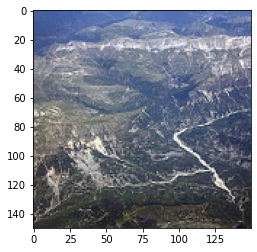

Label: 3


In [ ]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
try:
    label = train_dataset.target_transform.inverse_transform([train_labels[0]])
except:
    label = train_labels[0]
plt.imshow(img.permute(1, 2, 0), cmap="gray")
plt.show()
print(f"Label: {label}")

Used this article for shapes calculation
https://learnopencv.com/number-of-parameters-and-tensor-sizes-in-convolutional-neural-network/

In [ ]:
class CNN_MLP_network(nn.Module):
    def __init__(self, num_classes):
        super().__init__()

        self.num_classes = num_classes

        # CNN part
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)

        # formula [(W−K+2P)/S]+1.
        # W is the input volume - in your case 128
        # K is the Kernel size - in your case 5
        # P is the padding - in your case 0 i believe
        # S is the stride - which you have not provided.

        # MLP part
        self.fc1 = nn.Linear(in_features=34*34*16, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.out = nn.Linear(in_features=84, out_features=self.num_classes)

    def forward(self, t):
        #Layer 1
        t = t.float()  # 150, 150, 3
        #Layer 2
        t = self.conv1(t)  # 146, 146, 6
        t = F.relu(t)  # 146, 146, 6
        t = F.max_pool2d(t, kernel_size=2, stride=2)  # 73, 73, 6
        #Layer 3
        t = self.conv2(t)  # 69, 69, 16
        t = F.relu(t)  # 69, 69, 16
        t = F.max_pool2d(t, kernel_size=2, stride=2)  # 34, 34, 16
        #Layer 4
        t = t.reshape(-1, 34*34*16)
        t = self.fc1(t)
        t = F.relu(t)
        #Layer 5
        t = self.fc2(t)
        t = F.relu(t)
        #Layer 6/ Output Layer
        t = self.out(t)

        return t


class CNN_network(nn.Module):
    def __init__(self, num_classes):
        super().__init__()

        self.num_classes = num_classes

        # CNN part
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)

        # MLP part
        self.out = nn.Linear(in_features=34*34*16, out_features=self.num_classes)

    def forward(self, t):
        #Layer 1
        t = t.float()  # 150, 150, 3
        #Layer 2
        t = self.conv1(t)  # 146, 146, 6
        t = F.relu(t)  # 146, 146, 6
        t = F.max_pool2d(t, kernel_size=2, stride=2)  # 73, 73, 6
        #Layer 3
        t = self.conv2(t)  # 69, 69, 16
        t = F.relu(t)  # 69, 69, 16
        t = F.max_pool2d(t, kernel_size=2, stride=2)  # 34, 34, 16
        #Layer 4
        t = t.reshape(-1, 34*34*16)
        t = self.out(t)

        return t

In [ ]:
from tqdm.notebook import tqdm

@torch.no_grad()
def get_preds(model, loader):
    all_preds = torch.tensor([]).to(device)
    all_labels = torch.tensor([])
    for batch in loader:
        images, labels = batch
        images = images.to(device)
        # delete me
        images = images.float()
        preds = model(images)
        all_preds = torch.cat((all_preds, preds), dim=0)
        all_labels = torch.cat((all_labels, labels), dim=0)

    all_labels = all_labels.type(torch.LongTensor).to(device)
    return all_preds, all_labels

class EarlyStopper:
    def __init__(self, patience=1, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.min_validation_loss = np.inf

    def early_stop(self, validation_loss):
        if validation_loss < self.min_validation_loss:
            self.min_validation_loss = validation_loss
            self.counter = 0
        elif validation_loss > (self.min_validation_loss + self.min_delta):
            self.counter += 1
            print('Early stopping became worse. Now counter is', self.counter)
            if self.counter >= self.patience:
                return True
        return False

def train_nn(model, train_loader, val_dataloader, optimizer, es):
    print('>>> Training Start >>>')
    for epoch in tqdm(range(30), total=30):
        total_loss = 0
        total_correct = 0
        for batch in tqdm(train_loader):
            images, labels = batch
            images = images.to(device)
            labels = labels.to(device)
            # delete me
            images = images.float()
            predictions = model(images)
            # https://discuss.pytorch.org/t/f-cross-entropy-vs-torch-nn-cross-entropy-loss/25505
            # print('train types', predictions, labels)
            loss = F.cross_entropy(predictions, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss = total_loss + loss.item()
            total_correct = total_correct + predictions.argmax(dim=1).eq(labels).sum().item()

        val_preds, val_labels = get_preds(model, val_dataloader)
        # print('val types', val_preds, val_labels)
        val_loss = F.cross_entropy(val_preds, val_labels)
        f1_val = eval_clf(y_test=val_labels.cpu().numpy(), y_pred=val_preds.argmax(dim=1).cpu().numpy())
        print('epoch:', epoch, "train_loss:", total_loss, 'val_loss:', val_loss, 'val f1:', f1_val)

        if es.early_stop(val_loss):             
            break

    print('>>> Training Complete >>>')

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 
device

device(type='cuda', index=0)

### CNN_MLP

In [ ]:
model = CNN_MLP_network(num_classes=len(train_dataset.classes))
print(model)

CNN_MLP_network(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=18496, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (out): Linear(in_features=84, out_features=6, bias=True)
)


In [ ]:
model = model.to(device)
next(model.parameters()).is_cuda # returns a boolean

>>> Training Start >>>


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.59      0.55      0.57       439
           1       0.89      0.84      0.87       455
           2       0.70      0.57      0.63       481
           3       0.59      0.73      0.66       503
           4       0.59      0.53      0.56       455
           5       0.70      0.80      0.75       477

    accuracy                           0.67      2810
   macro avg       0.68      0.67      0.67      2810
weighted avg       0.68      0.67      0.67      2810

epoch: 0 train_loss: 150.7524295449257 val_loss: tensor(0.8850, device='cuda:0') val f1: 0.67


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.61      0.58      0.59       439
           1       0.93      0.81      0.87       455
           2       0.71      0.61      0.66       481
           3       0.62      0.69      0.65       503
           4       0.60      0.57      0.58       455
           5       0.68      0.84      0.75       477

    accuracy                           0.68      2810
   macro avg       0.69      0.68      0.68      2810
weighted avg       0.69      0.68      0.68      2810

epoch: 1 train_loss: 135.70240902900696 val_loss: tensor(0.8647, device='cuda:0') val f1: 0.68


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.60      0.61      0.61       439
           1       0.94      0.82      0.87       455
           2       0.61      0.76      0.68       481
           3       0.60      0.72      0.66       503
           4       0.77      0.36      0.49       455
           5       0.71      0.82      0.76       477

    accuracy                           0.68      2810
   macro avg       0.70      0.68      0.68      2810
weighted avg       0.70      0.68      0.68      2810

epoch: 2 train_loss: 123.15994408726692 val_loss: tensor(0.8439, device='cuda:0') val f1: 0.68


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.49      0.76      0.60       439
           1       0.87      0.89      0.88       455
           2       0.76      0.52      0.61       481
           3       0.74      0.59      0.66       503
           4       0.66      0.64      0.65       455
           5       0.74      0.75      0.75       477

    accuracy                           0.69      2810
   macro avg       0.71      0.69      0.69      2810
weighted avg       0.71      0.69      0.69      2810

epoch: 3 train_loss: 112.88308882713318 val_loss: tensor(0.8951, device='cuda:0') val f1: 0.69


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.76      0.36      0.49       439
           1       0.91      0.85      0.88       455
           2       0.66      0.63      0.64       481
           3       0.66      0.64      0.65       503
           4       0.51      0.77      0.62       455
           5       0.72      0.82      0.77       477

    accuracy                           0.68      2810
   macro avg       0.70      0.68      0.67      2810
weighted avg       0.70      0.68      0.67      2810

epoch: 4 train_loss: 103.65235117077827 val_loss: tensor(0.9147, device='cuda:0') val f1: 0.68


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.63      0.69      0.66       439
           1       0.74      0.94      0.83       455
           2       0.68      0.73      0.71       481
           3       0.63      0.72      0.67       503
           4       0.80      0.47      0.59       455
           5       0.81      0.65      0.72       477

    accuracy                           0.70      2810
   macro avg       0.71      0.70      0.70      2810
weighted avg       0.71      0.70      0.70      2810

epoch: 5 train_loss: 87.62339544296265 val_loss: tensor(0.8494, device='cuda:0') val f1: 0.7
>>> Training Complete >>>


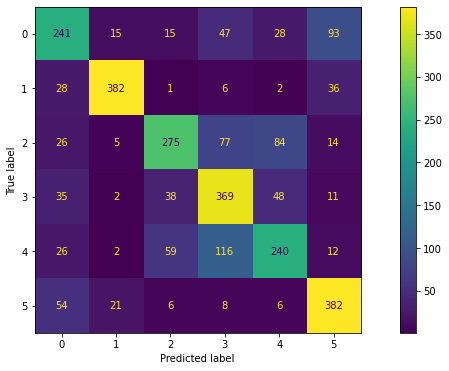

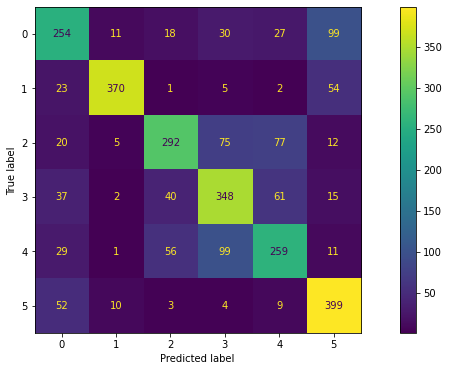

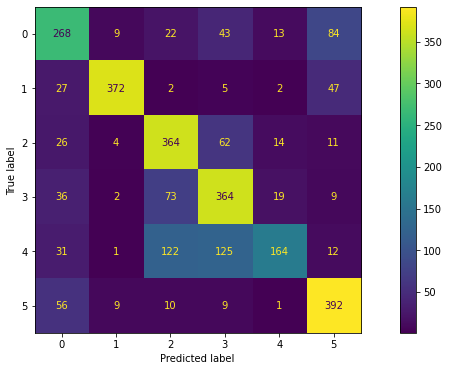

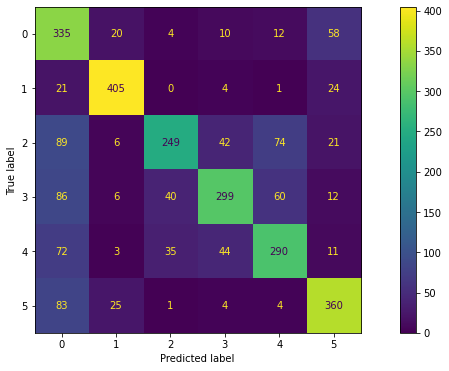

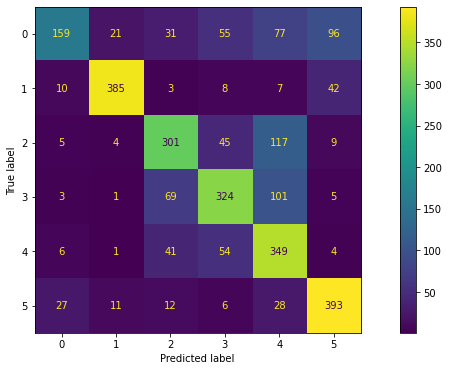

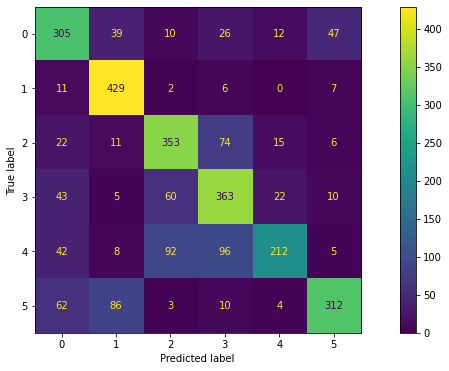

In [ ]:
early_stopper = EarlyStopper(patience=3)
optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)
train_nn(model, train_dataloader, val_dataloader, optimizer, early_stopper)

### CNN

In [ ]:
model = CNN_network(num_classes=len(train_dataset.classes))
model = model.to(device)
next(model.parameters()).is_cuda # returns a boolean

True

In [ ]:
print(model)

CNN_network(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (out): Linear(in_features=18496, out_features=6, bias=True)
)


>>> Training Start >>>


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       443
           1       0.64      0.80      0.71       470
           2       0.44      0.26      0.33       488
           3       0.50      0.46      0.48       499
           4       0.00      0.00      0.00       457
           5       0.24      0.80      0.37       449

    accuracy                           0.39      2806
   macro avg       0.31      0.38      0.31      2806
weighted avg       0.31      0.39      0.32      2806

epoch: 0 train_loss: 313.129514336586 val_loss: tensor(1.7611, device='cuda:0') val f1: 0.39


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       1.00      0.00      0.01       443
           1       0.61      0.91      0.73       470
           2       0.34      0.78      0.47       488
           3       0.44      0.68      0.53       499
           4       0.00      0.00      0.00       457
           5       0.60      0.29      0.39       449

    accuracy                           0.45      2806
   macro avg       0.50      0.44      0.36      2806
weighted avg       0.49      0.45      0.36      2806

epoch: 1 train_loss: 303.2811894416809 val_loss: tensor(1.6634, device='cuda:0') val f1: 0.45


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.59      0.09      0.16       443
           1       0.65      0.86      0.74       470
           2       0.42      0.69      0.53       488
           3       0.39      0.72      0.51       499
           4       0.19      0.02      0.04       457
           5       0.53      0.41      0.46       449

    accuracy                           0.48      2806
   macro avg       0.46      0.46      0.41      2806
weighted avg       0.46      0.48      0.41      2806

epoch: 2 train_loss: 271.72951877117157 val_loss: tensor(1.4150, device='cuda:0') val f1: 0.48


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.46      0.32      0.38       443
           1       0.67      0.83      0.74       470
           2       0.46      0.70      0.56       488
           3       0.47      0.66      0.55       499
           4       0.14      0.01      0.01       457
           5       0.55      0.56      0.55       449

    accuracy                           0.52      2806
   macro avg       0.46      0.51      0.47      2806
weighted avg       0.46      0.52      0.47      2806

epoch: 3 train_loss: 233.33054268360138 val_loss: tensor(1.2832, device='cuda:0') val f1: 0.52


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.46      0.35      0.40       443
           1       0.68      0.85      0.76       470
           2       0.54      0.60      0.57       488
           3       0.50      0.64      0.56       499
           4       0.38      0.13      0.19       457
           5       0.53      0.64      0.58       449

    accuracy                           0.54      2806
   macro avg       0.51      0.53      0.51      2806
weighted avg       0.51      0.54      0.51      2806

epoch: 4 train_loss: 218.65908348560333 val_loss: tensor(1.2447, device='cuda:0') val f1: 0.54


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.48      0.30      0.37       443
           1       0.70      0.83      0.76       470
           2       0.58      0.53      0.55       488
           3       0.53      0.60      0.56       499
           4       0.34      0.32      0.33       457
           5       0.55      0.66      0.60       449

    accuracy                           0.54      2806
   macro avg       0.53      0.54      0.53      2806
weighted avg       0.53      0.54      0.53      2806

epoch: 5 train_loss: 211.3536781668663 val_loss: tensor(1.2126, device='cuda:0') val f1: 0.54


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.50      0.33      0.39       443
           1       0.70      0.85      0.77       470
           2       0.55      0.56      0.56       488
           3       0.51      0.65      0.57       499
           4       0.36      0.22      0.28       457
           5       0.57      0.67      0.61       449

    accuracy                           0.55      2806
   macro avg       0.53      0.55      0.53      2806
weighted avg       0.53      0.55      0.53      2806

epoch: 6 train_loss: 205.76634126901627 val_loss: tensor(1.1803, device='cuda:0') val f1: 0.55


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.45      0.52      0.48       443
           1       0.74      0.85      0.79       470
           2       0.49      0.72      0.58       488
           3       0.55      0.61      0.57       499
           4       0.45      0.09      0.15       457
           5       0.66      0.57      0.62       449

    accuracy                           0.56      2806
   macro avg       0.56      0.56      0.53      2806
weighted avg       0.56      0.56      0.53      2806

epoch: 7 train_loss: 201.1382976770401 val_loss: tensor(1.1496, device='cuda:0') val f1: 0.56


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.47      0.45      0.46       443
           1       0.76      0.83      0.79       470
           2       0.53      0.64      0.58       488
           3       0.52      0.67      0.59       499
           4       0.39      0.16      0.23       457
           5       0.63      0.63      0.63       449

    accuracy                           0.57      2806
   macro avg       0.55      0.56      0.55      2806
weighted avg       0.55      0.57      0.55      2806

epoch: 8 train_loss: 195.8461674451828 val_loss: tensor(1.1143, device='cuda:0') val f1: 0.57


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.51      0.46      0.48       443
           1       0.79      0.80      0.80       470
           2       0.60      0.55      0.57       488
           3       0.53      0.66      0.58       499
           4       0.41      0.33      0.36       457
           5       0.62      0.67      0.64       449

    accuracy                           0.58      2806
   macro avg       0.57      0.58      0.57      2806
weighted avg       0.58      0.58      0.58      2806

epoch: 9 train_loss: 190.60968804359436 val_loss: tensor(1.0901, device='cuda:0') val f1: 0.58


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.50      0.48      0.49       443
           1       0.76      0.90      0.83       470
           2       0.57      0.58      0.57       488
           3       0.49      0.72      0.58       499
           4       0.43      0.16      0.23       457
           5       0.68      0.64      0.66       449

    accuracy                           0.58      2806
   macro avg       0.57      0.58      0.56      2806
weighted avg       0.57      0.58      0.56      2806

epoch: 10 train_loss: 186.11034655570984 val_loss: tensor(1.0664, device='cuda:0') val f1: 0.58


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.53      0.49      0.51       443
           1       0.83      0.82      0.83       470
           2       0.56      0.61      0.59       488
           3       0.52      0.67      0.59       499
           4       0.45      0.28      0.35       457
           5       0.64      0.69      0.66       449

    accuracy                           0.60      2806
   macro avg       0.59      0.59      0.59      2806
weighted avg       0.59      0.60      0.59      2806

epoch: 11 train_loss: 181.70902353525162 val_loss: tensor(1.0398, device='cuda:0') val f1: 0.6


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.52      0.55      0.53       443
           1       0.80      0.88      0.84       470
           2       0.62      0.59      0.60       488
           3       0.57      0.63      0.60       499
           4       0.49      0.37      0.42       457
           5       0.67      0.68      0.67       449

    accuracy                           0.62      2806
   macro avg       0.61      0.62      0.61      2806
weighted avg       0.61      0.62      0.61      2806

epoch: 12 train_loss: 178.5855353474617 val_loss: tensor(1.0228, device='cuda:0') val f1: 0.62


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.54      0.53      0.53       443
           1       0.81      0.89      0.84       470
           2       0.57      0.64      0.60       488
           3       0.54      0.67      0.60       499
           4       0.56      0.32      0.41       457
           5       0.68      0.67      0.68       449

    accuracy                           0.62      2806
   macro avg       0.62      0.62      0.61      2806
weighted avg       0.62      0.62      0.61      2806

epoch: 13 train_loss: 175.39449846744537 val_loss: tensor(1.0042, device='cuda:0') val f1: 0.62


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.53      0.58      0.56       443
           1       0.80      0.89      0.84       470
           2       0.57      0.65      0.61       488
           3       0.58      0.61      0.60       499
           4       0.56      0.35      0.43       457
           5       0.70      0.67      0.68       449

    accuracy                           0.63      2806
   macro avg       0.62      0.62      0.62      2806
weighted avg       0.62      0.63      0.62      2806

epoch: 14 train_loss: 173.3563807606697 val_loss: tensor(0.9950, device='cuda:0') val f1: 0.63


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.59      0.54      0.57       443
           1       0.85      0.83      0.84       470
           2       0.50      0.76      0.60       488
           3       0.58      0.64      0.61       499
           4       0.66      0.23      0.34       457
           5       0.66      0.71      0.68       449

    accuracy                           0.62      2806
   macro avg       0.64      0.62      0.61      2806
weighted avg       0.64      0.62      0.61      2806

epoch: 15 train_loss: 171.4654864668846 val_loss: tensor(0.9864, device='cuda:0') val f1: 0.62


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.56      0.60      0.58       443
           1       0.85      0.82      0.84       470
           2       0.49      0.77      0.60       488
           3       0.59      0.62      0.61       499
           4       0.74      0.19      0.30       457
           5       0.67      0.70      0.69       449

    accuracy                           0.62      2806
   macro avg       0.65      0.62      0.60      2806
weighted avg       0.65      0.62      0.60      2806

epoch: 16 train_loss: 169.63631910085678 val_loss: tensor(0.9783, device='cuda:0') val f1: 0.62


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.52      0.65      0.58       443
           1       0.82      0.88      0.85       470
           2       0.58      0.67      0.62       488
           3       0.57      0.64      0.60       499
           4       0.69      0.32      0.44       457
           5       0.71      0.65      0.68       449

    accuracy                           0.64      2806
   macro avg       0.65      0.63      0.63      2806
weighted avg       0.65      0.64      0.63      2806

epoch: 17 train_loss: 168.36445486545563 val_loss: tensor(0.9690, device='cuda:0') val f1: 0.64


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.58      0.56      0.57       443
           1       0.88      0.80      0.84       470
           2       0.64      0.58      0.61       488
           3       0.54      0.69      0.61       499
           4       0.55      0.49      0.52       457
           5       0.68      0.71      0.69       449

    accuracy                           0.64      2806
   macro avg       0.65      0.64      0.64      2806
weighted avg       0.64      0.64      0.64      2806

epoch: 18 train_loss: 167.09899854660034 val_loss: tensor(0.9603, device='cuda:0') val f1: 0.64


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.56      0.60      0.58       443
           1       0.82      0.86      0.84       470
           2       0.63      0.65      0.64       488
           3       0.58      0.64      0.61       499
           4       0.62      0.43      0.51       457
           5       0.67      0.71      0.69       449

    accuracy                           0.65      2806
   macro avg       0.65      0.65      0.65      2806
weighted avg       0.65      0.65      0.65      2806

epoch: 19 train_loss: 165.26122504472733 val_loss: tensor(0.9488, device='cuda:0') val f1: 0.65


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.53      0.66      0.59       443
           1       0.82      0.86      0.84       470
           2       0.69      0.57      0.62       488
           3       0.62      0.57      0.60       499
           4       0.54      0.56      0.55       457
           5       0.69      0.67      0.68       449

    accuracy                           0.65      2806
   macro avg       0.65      0.65      0.65      2806
weighted avg       0.65      0.65      0.65      2806

epoch: 20 train_loss: 164.57135009765625 val_loss: tensor(0.9513, device='cuda:0') val f1: 0.65
Early stopping became worse. Now counter is 1


<ipython-input-5-82d8a1aa69ea>:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(14, 6))


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.61      0.55      0.58       443
           1       0.88      0.81      0.84       470
           2       0.59      0.70      0.64       488
           3       0.61      0.65      0.63       499
           4       0.61      0.49      0.54       457
           5       0.67      0.74      0.70       449

    accuracy                           0.66      2806
   macro avg       0.66      0.66      0.66      2806
weighted avg       0.66      0.66      0.66      2806

epoch: 21 train_loss: 163.6396673321724 val_loss: tensor(0.9378, device='cuda:0') val f1: 0.66


<ipython-input-5-82d8a1aa69ea>:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(14, 6))


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.61      0.59      0.60       443
           1       0.89      0.80      0.84       470
           2       0.64      0.61      0.63       488
           3       0.60      0.65      0.62       499
           4       0.54      0.58      0.56       457
           5       0.70      0.72      0.71       449

    accuracy                           0.66      2806
   macro avg       0.66      0.66      0.66      2806
weighted avg       0.66      0.66      0.66      2806

epoch: 22 train_loss: 162.27087479829788 val_loss: tensor(0.9372, device='cuda:0') val f1: 0.66


<ipython-input-5-82d8a1aa69ea>:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(14, 6))


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.64      0.51      0.56       443
           1       0.86      0.81      0.84       470
           2       0.67      0.48      0.56       488
           3       0.60      0.60      0.60       499
           4       0.46      0.69      0.56       457
           5       0.68      0.73      0.71       449

    accuracy                           0.64      2806
   macro avg       0.65      0.64      0.64      2806
weighted avg       0.65      0.64      0.64      2806

epoch: 23 train_loss: 161.490108191967 val_loss: tensor(0.9449, device='cuda:0') val f1: 0.64
Early stopping became worse. Now counter is 1


<ipython-input-5-82d8a1aa69ea>:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(14, 6))


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.58      0.57      0.57       443
           1       0.82      0.85      0.83       470
           2       0.55      0.76      0.64       488
           3       0.61      0.61      0.61       499
           4       0.71      0.33      0.46       457
           5       0.66      0.72      0.69       449

    accuracy                           0.64      2806
   macro avg       0.66      0.64      0.63      2806
weighted avg       0.65      0.64      0.63      2806

epoch: 24 train_loss: 160.4197353720665 val_loss: tensor(0.9289, device='cuda:0') val f1: 0.64


<ipython-input-5-82d8a1aa69ea>:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(14, 6))


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.62      0.50      0.55       443
           1       0.84      0.83      0.83       470
           2       0.64      0.65      0.65       488
           3       0.56      0.68      0.61       499
           4       0.60      0.54      0.57       457
           5       0.67      0.72      0.70       449

    accuracy                           0.66      2806
   macro avg       0.66      0.65      0.65      2806
weighted avg       0.66      0.66      0.65      2806

epoch: 25 train_loss: 159.51312363147736 val_loss: tensor(0.9159, device='cuda:0') val f1: 0.66


<ipython-input-5-82d8a1aa69ea>:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(14, 6))


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.60      0.60      0.60       443
           1       0.84      0.84      0.84       470
           2       0.58      0.75      0.65       488
           3       0.59      0.65      0.62       499
           4       0.73      0.34      0.47       457
           5       0.67      0.73      0.70       449

    accuracy                           0.66      2806
   macro avg       0.67      0.65      0.65      2806
weighted avg       0.67      0.66      0.65      2806

epoch: 26 train_loss: 158.70666307210922 val_loss: tensor(0.9136, device='cuda:0') val f1: 0.66


<ipython-input-5-82d8a1aa69ea>:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(14, 6))


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.57      0.62      0.59       443
           1       0.79      0.90      0.84       470
           2       0.61      0.72      0.66       488
           3       0.60      0.63      0.62       499
           4       0.69      0.41      0.51       457
           5       0.70      0.68      0.69       449

    accuracy                           0.66      2806
   macro avg       0.66      0.66      0.65      2806
weighted avg       0.66      0.66      0.65      2806

epoch: 27 train_loss: 157.91565173864365 val_loss: tensor(0.9143, device='cuda:0') val f1: 0.66
Early stopping became worse. Now counter is 1


<ipython-input-5-82d8a1aa69ea>:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(14, 6))


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.63      0.57      0.60       443
           1       0.78      0.91      0.84       470
           2       0.67      0.66      0.66       488
           3       0.58      0.67      0.62       499
           4       0.62      0.53      0.57       457
           5       0.72      0.67      0.70       449

    accuracy                           0.67      2806
   macro avg       0.67      0.67      0.67      2806
weighted avg       0.67      0.67      0.67      2806

epoch: 28 train_loss: 156.62545281648636 val_loss: tensor(0.9027, device='cuda:0') val f1: 0.67


<ipython-input-5-82d8a1aa69ea>:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(14, 6))


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.61      0.60      0.61       443
           1       0.83      0.86      0.85       470
           2       0.68      0.64      0.66       488
           3       0.63      0.61      0.62       499
           4       0.57      0.60      0.59       457
           5       0.70      0.71      0.71       449

    accuracy                           0.67      2806
   macro avg       0.67      0.67      0.67      2806
weighted avg       0.67      0.67      0.67      2806

epoch: 29 train_loss: 156.13489431142807 val_loss: tensor(0.8954, device='cuda:0') val f1: 0.67
>>> Training Complete >>>


<ipython-input-5-82d8a1aa69ea>:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(14, 6))


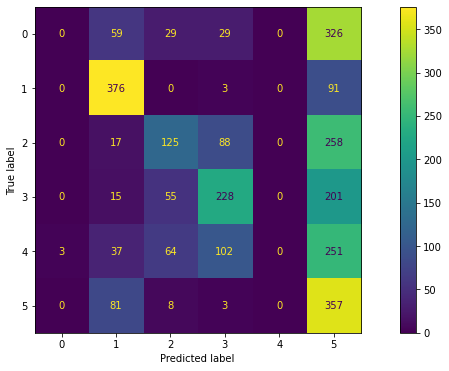

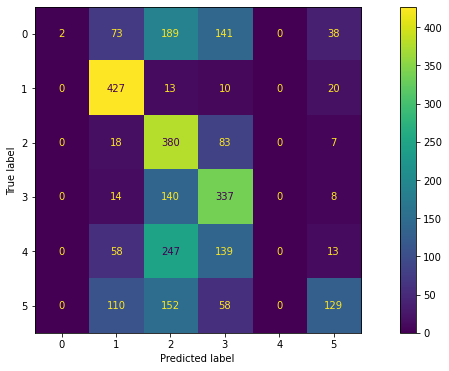

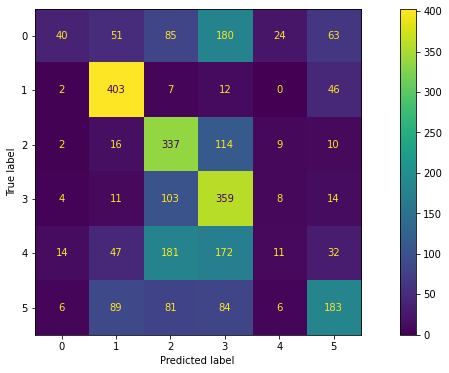

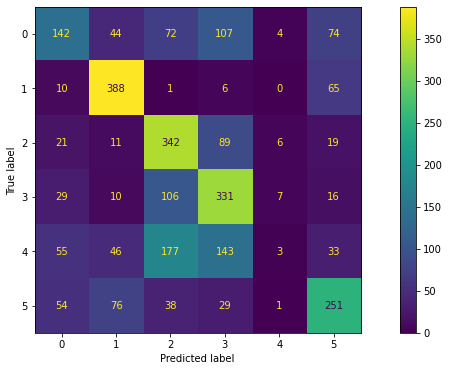

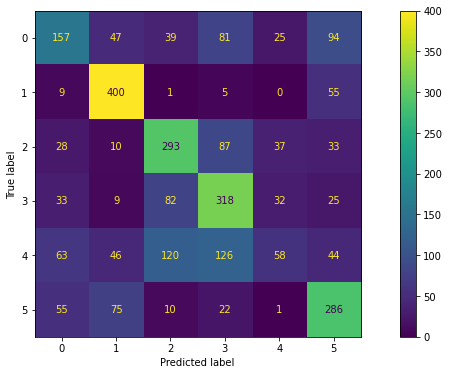

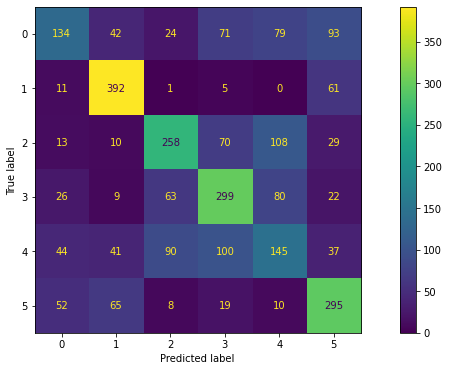

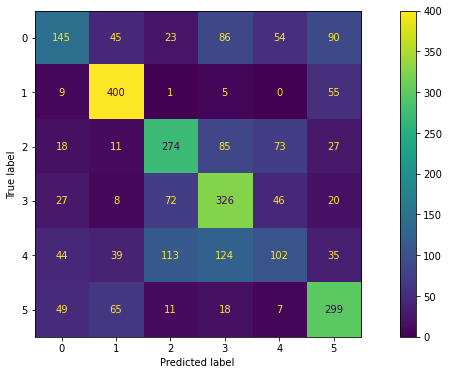

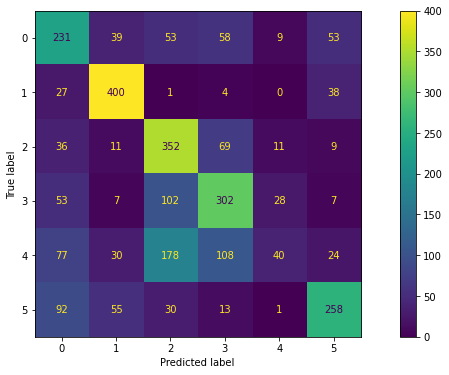

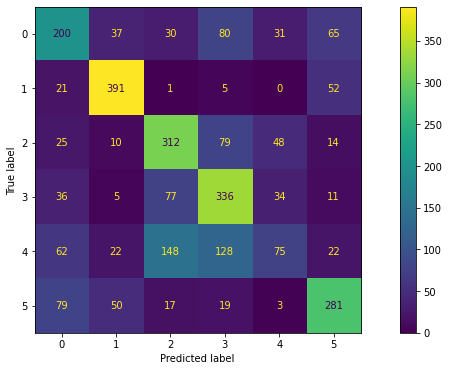

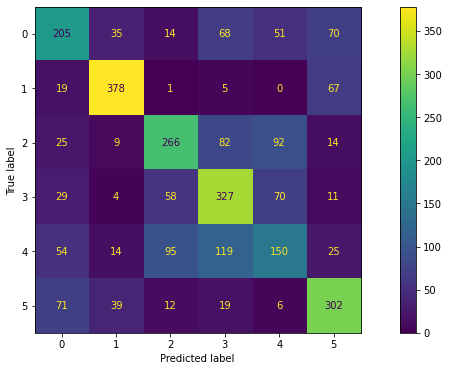

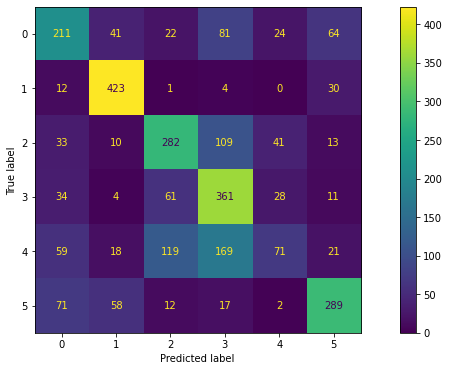

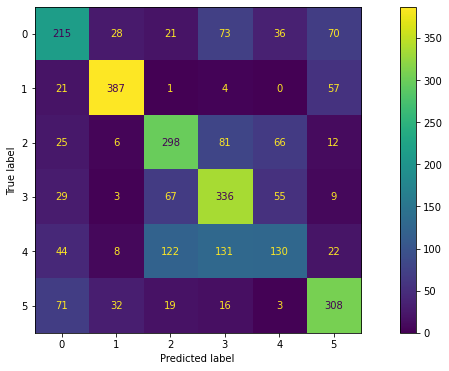

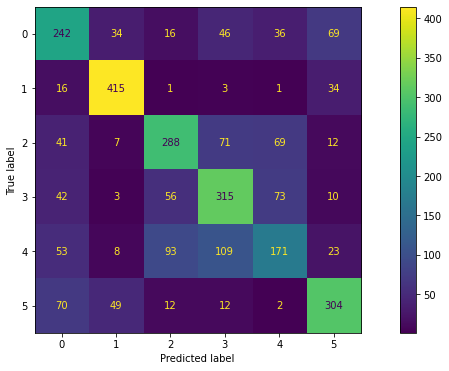

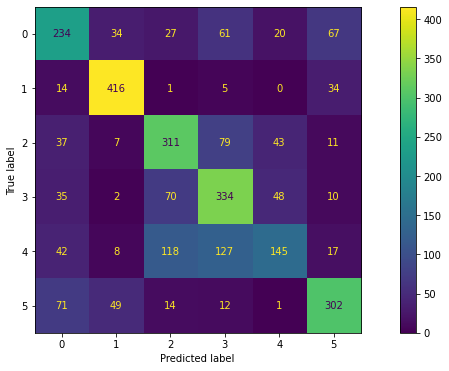

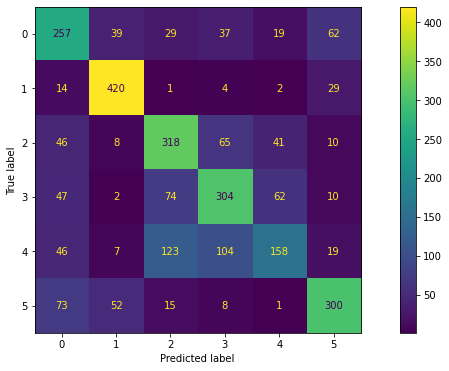

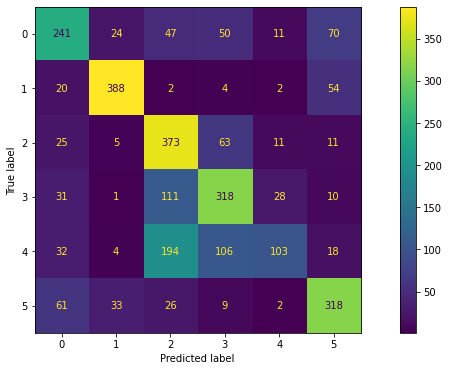

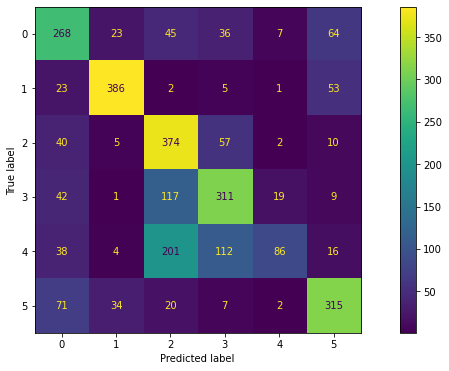

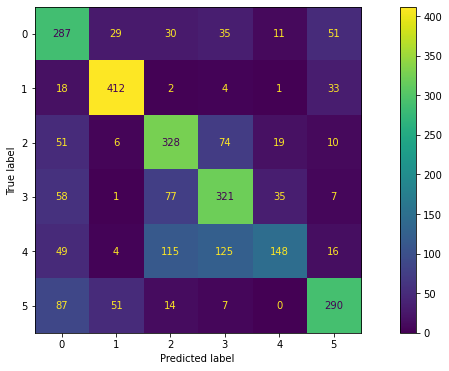

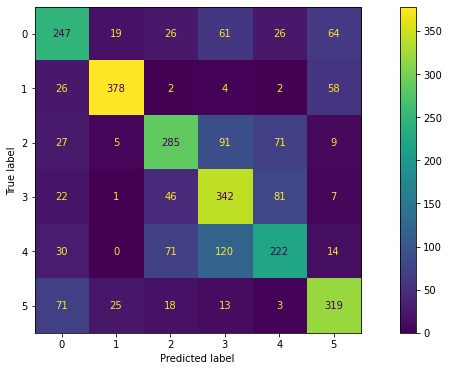

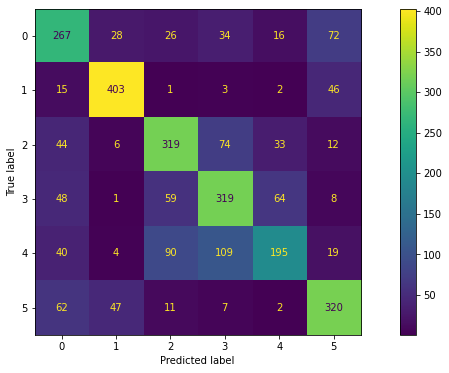

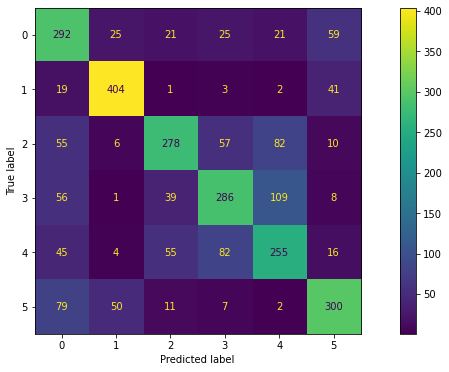

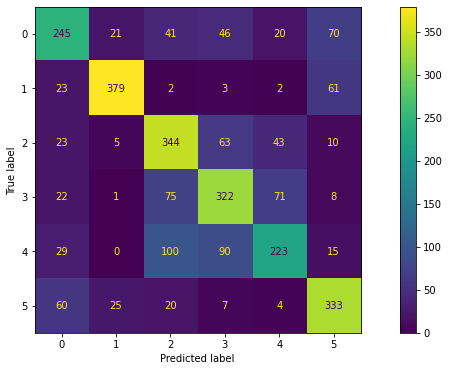

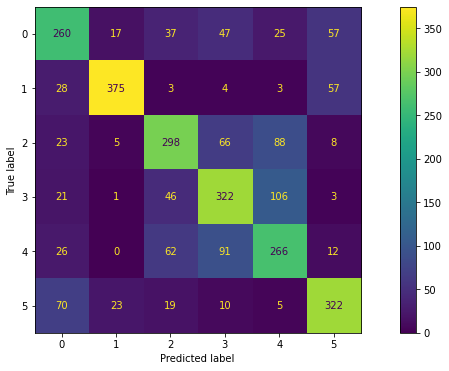

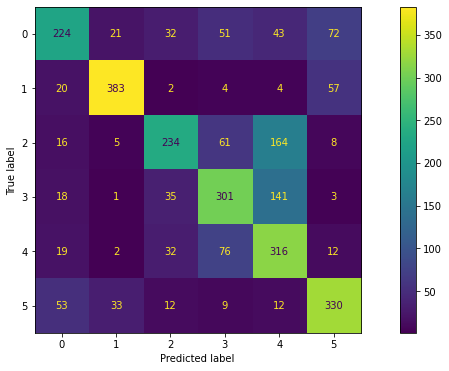

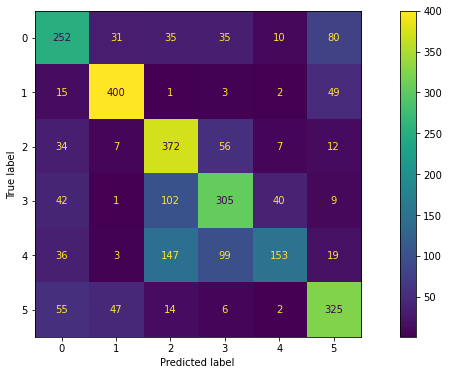

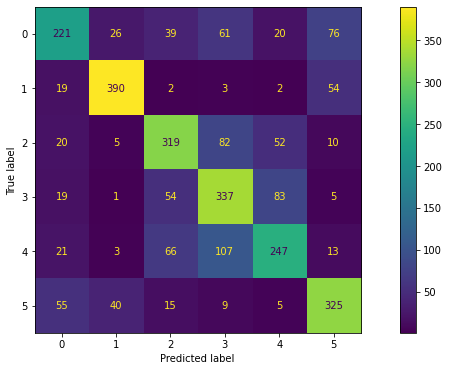

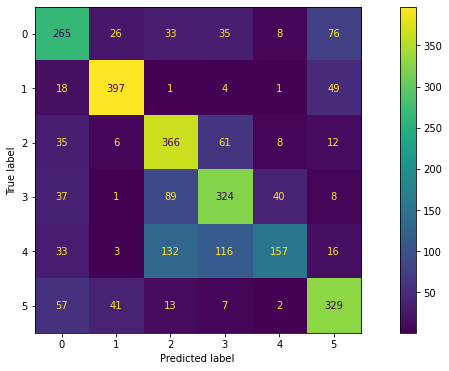

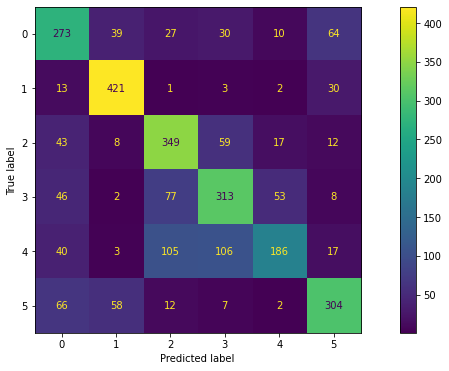

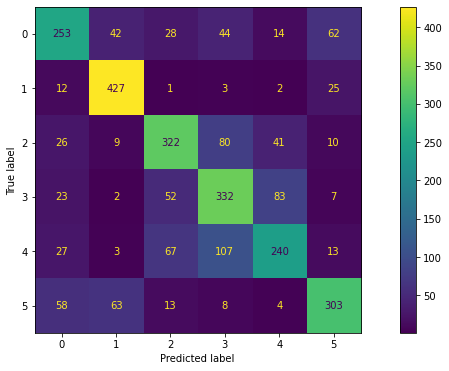

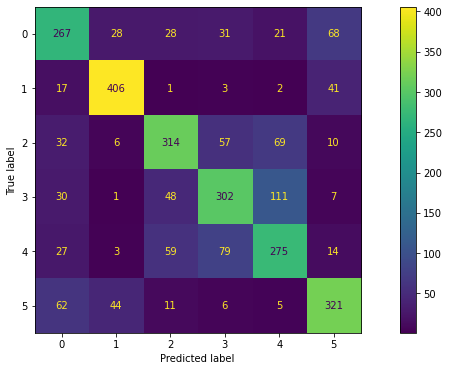

In [ ]:
early_stopper = EarlyStopper(patience=3)
optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)
train_nn(model, train_dataloader, val_dataloader, optimizer, early_stopper)

RuntimeError: Input type (unsigned char) and bias type (float) should be the same

## Finetuned CNN

TODO: consider some kind of normalization to take manage different dataset statistics

TODO: does the model contain input normalization. What kind of input it expects

In [ ]:
import torchvision
model = torchvision.models.wide_resnet50_2(pretrained=True)

for param in model.parameters():
    param.required_grad = False

num_ftrt = model.fc.in_features

model.fc = nn.Linear(num_ftrt, len(train_dataset.classes))
model.to(device)
model

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Wide_ResNet50_2_Weights.IMAGENET1K_V1`. You can also use `weights=Wide_ResNet50_2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), strid

>>> Training Start >>>


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.87      0.71      0.78       439
           1       0.91      0.96      0.94       455
           2       0.63      0.75      0.68       481
           3       0.70      0.62      0.66       503
           4       0.81      0.71      0.76       455
           5       0.79      0.89      0.83       477

    accuracy                           0.77      2810
   macro avg       0.78      0.77      0.77      2810
weighted avg       0.78      0.77      0.77      2810

epoch: 0 train_loss: 264.70397090911865 val_loss: tensor(1.1463, device='cuda:0') val f1: 0.77


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       439
           1       0.95      0.97      0.96       455
           2       0.77      0.77      0.77       481
           3       0.77      0.78      0.77       503
           4       0.90      0.86      0.88       455
           5       0.89      0.92      0.91       477

    accuracy                           0.86      2810
   macro avg       0.86      0.86      0.86      2810
weighted avg       0.86      0.86      0.86      2810

epoch: 1 train_loss: 153.75007647275925 val_loss: tensor(0.6912, device='cuda:0') val f1: 0.86


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       439
           1       0.95      0.98      0.97       455
           2       0.79      0.80      0.80       481
           3       0.81      0.77      0.79       503
           4       0.90      0.91      0.90       455
           5       0.92      0.90      0.91       477

    accuracy                           0.87      2810
   macro avg       0.88      0.88      0.88      2810
weighted avg       0.87      0.87      0.87      2810

epoch: 2 train_loss: 96.29451990127563 val_loss: tensor(0.4945, device='cuda:0') val f1: 0.87


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       439
           1       0.95      0.98      0.96       455
           2       0.83      0.80      0.81       481
           3       0.83      0.81      0.82       503
           4       0.92      0.93      0.92       455
           5       0.91      0.92      0.92       477

    accuracy                           0.89      2810
   macro avg       0.89      0.89      0.89      2810
weighted avg       0.89      0.89      0.89      2810

epoch: 3 train_loss: 69.74058681726456 val_loss: tensor(0.3870, device='cuda:0') val f1: 0.89


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       439
           1       0.96      0.98      0.97       455
           2       0.84      0.79      0.81       481
           3       0.81      0.82      0.82       503
           4       0.92      0.94      0.93       455
           5       0.92      0.94      0.93       477

    accuracy                           0.90      2810
   macro avg       0.90      0.90      0.90      2810
weighted avg       0.90      0.90      0.90      2810

epoch: 4 train_loss: 56.66673944890499 val_loss: tensor(0.3397, device='cuda:0') val f1: 0.9


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       439
           1       0.97      0.98      0.97       455
           2       0.84      0.80      0.82       481
           3       0.84      0.84      0.84       503
           4       0.93      0.95      0.94       455
           5       0.92      0.94      0.93       477

    accuracy                           0.90      2810
   macro avg       0.90      0.91      0.91      2810
weighted avg       0.90      0.90      0.90      2810

epoch: 5 train_loss: 48.12851259112358 val_loss: tensor(0.3152, device='cuda:0') val f1: 0.9


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       439
           1       0.98      0.98      0.98       455
           2       0.85      0.81      0.83       481
           3       0.84      0.85      0.85       503
           4       0.93      0.95      0.94       455
           5       0.92      0.95      0.93       477

    accuracy                           0.91      2810
   macro avg       0.91      0.91      0.91      2810
weighted avg       0.91      0.91      0.91      2810

epoch: 6 train_loss: 43.411529526114464 val_loss: tensor(0.2875, device='cuda:0') val f1: 0.91


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       439
           1       0.97      0.98      0.97       455
           2       0.85      0.81      0.83       481
           3       0.83      0.84      0.84       503
           4       0.94      0.94      0.94       455
           5       0.94      0.95      0.94       477

    accuracy                           0.91      2810
   macro avg       0.91      0.91      0.91      2810
weighted avg       0.91      0.91      0.91      2810

epoch: 7 train_loss: 37.3963727876544 val_loss: tensor(0.2786, device='cuda:0') val f1: 0.91


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       439
           1       0.97      0.98      0.97       455
           2       0.88      0.81      0.84       481
           3       0.84      0.87      0.86       503
           4       0.93      0.94      0.94       455
           5       0.94      0.94      0.94       477

    accuracy                           0.91      2810
   macro avg       0.91      0.91      0.91      2810
weighted avg       0.91      0.91      0.91      2810

epoch: 8 train_loss: 34.12271985411644 val_loss: tensor(0.2750, device='cuda:0') val f1: 0.91


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       439
           1       0.96      0.98      0.97       455
           2       0.87      0.81      0.84       481
           3       0.84      0.87      0.85       503
           4       0.93      0.95      0.94       455
           5       0.93      0.95      0.94       477

    accuracy                           0.91      2810
   macro avg       0.91      0.91      0.91      2810
weighted avg       0.91      0.91      0.91      2810

epoch: 9 train_loss: 31.759031429886818 val_loss: tensor(0.2676, device='cuda:0') val f1: 0.91


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       439
           1       0.97      0.98      0.97       455
           2       0.87      0.82      0.84       481
           3       0.84      0.87      0.85       503
           4       0.95      0.95      0.95       455
           5       0.94      0.94      0.94       477

    accuracy                           0.92      2810
   macro avg       0.92      0.92      0.92      2810
weighted avg       0.92      0.92      0.92      2810

epoch: 10 train_loss: 28.576186202466488 val_loss: tensor(0.2564, device='cuda:0') val f1: 0.92


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       439
           1       0.97      0.98      0.98       455
           2       0.88      0.81      0.84       481
           3       0.85      0.87      0.86       503
           4       0.94      0.95      0.95       455
           5       0.93      0.95      0.94       477

    accuracy                           0.91      2810
   macro avg       0.92      0.92      0.92      2810
weighted avg       0.91      0.91      0.91      2810

epoch: 11 train_loss: 27.23617957159877 val_loss: tensor(0.2608, device='cuda:0') val f1: 0.91
Early stopping became worse. Now counter is 1


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       439
           1       0.98      0.98      0.98       455
           2       0.87      0.80      0.84       481
           3       0.83      0.88      0.85       503
           4       0.95      0.95      0.95       455
           5       0.93      0.94      0.93       477

    accuracy                           0.91      2810
   macro avg       0.91      0.91      0.91      2810
weighted avg       0.91      0.91      0.91      2810

epoch: 12 train_loss: 23.617598813027143 val_loss: tensor(0.2593, device='cuda:0') val f1: 0.91
Early stopping became worse. Now counter is 2


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       439
           1       0.97      0.98      0.98       455
           2       0.86      0.82      0.84       481
           3       0.86      0.86      0.86       503
           4       0.95      0.96      0.95       455
           5       0.93      0.93      0.93       477

    accuracy                           0.91      2810
   macro avg       0.91      0.91      0.91      2810
weighted avg       0.91      0.91      0.91      2810

epoch: 13 train_loss: 21.973021164536476 val_loss: tensor(0.2482, device='cuda:0') val f1: 0.91


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       439
           1       0.97      0.98      0.97       455
           2       0.86      0.83      0.84       481
           3       0.86      0.86      0.86       503
           4       0.95      0.96      0.96       455
           5       0.93      0.94      0.94       477

    accuracy                           0.91      2810
   macro avg       0.92      0.92      0.92      2810
weighted avg       0.91      0.91      0.91      2810

epoch: 14 train_loss: 20.27987962961197 val_loss: tensor(0.2554, device='cuda:0') val f1: 0.91
Early stopping became worse. Now counter is 1


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       439
           1       0.97      0.98      0.97       455
           2       0.87      0.81      0.84       481
           3       0.84      0.88      0.86       503
           4       0.95      0.95      0.95       455
           5       0.93      0.94      0.94       477

    accuracy                           0.91      2810
   macro avg       0.91      0.91      0.91      2810
weighted avg       0.91      0.91      0.91      2810

epoch: 15 train_loss: 18.071855440735817 val_loss: tensor(0.2518, device='cuda:0') val f1: 0.91
Early stopping became worse. Now counter is 2


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       439
           1       0.98      0.98      0.98       455
           2       0.88      0.83      0.85       481
           3       0.85      0.89      0.87       503
           4       0.94      0.95      0.95       455
           5       0.93      0.94      0.93       477

    accuracy                           0.92      2810
   macro avg       0.92      0.92      0.92      2810
weighted avg       0.92      0.92      0.92      2810

epoch: 16 train_loss: 16.384461814537644 val_loss: tensor(0.2550, device='cuda:0') val f1: 0.92
Early stopping became worse. Now counter is 3
>>> Training Complete >>>


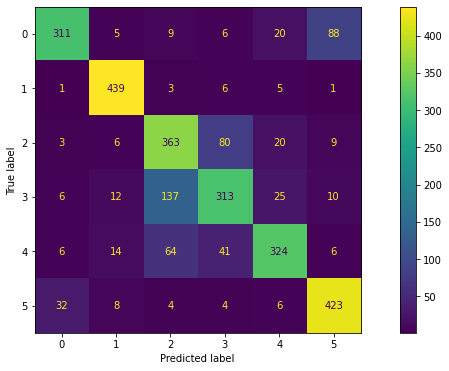

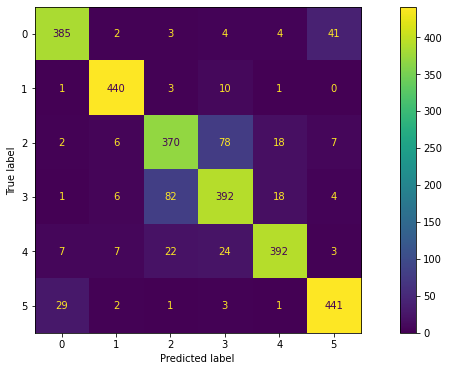

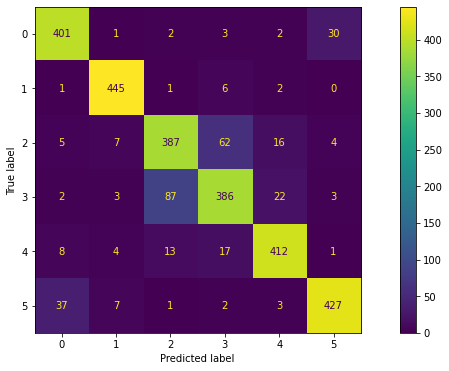

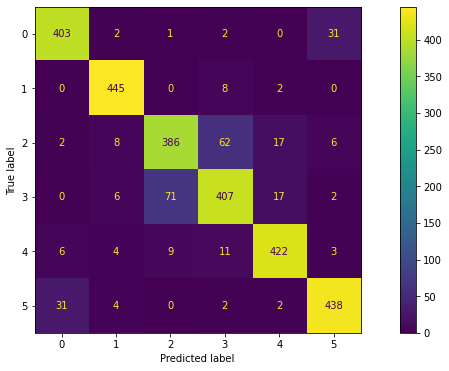

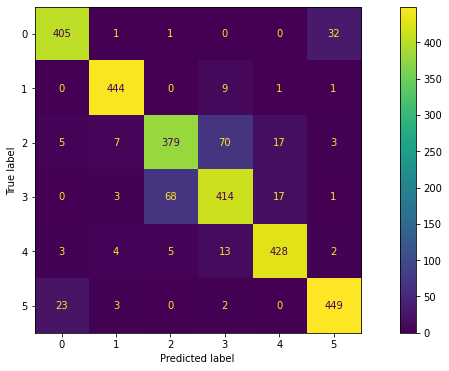

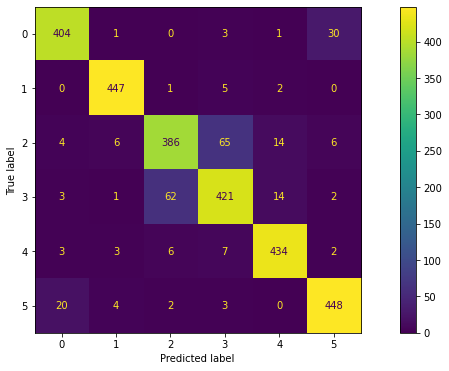

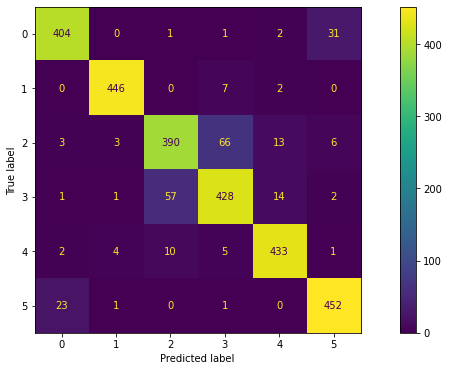

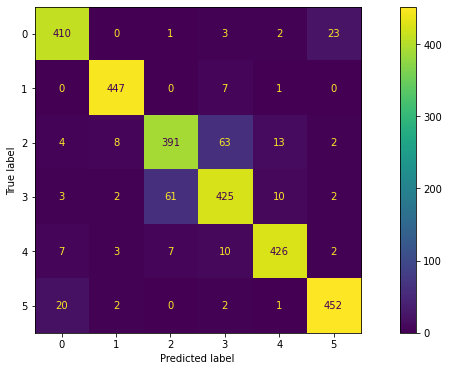

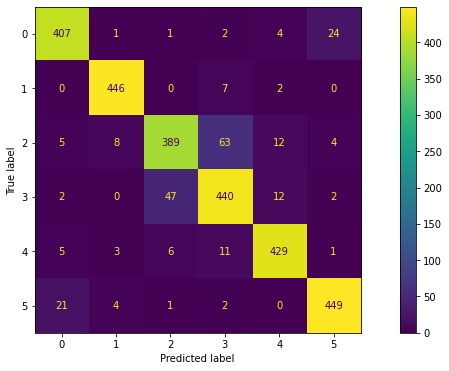

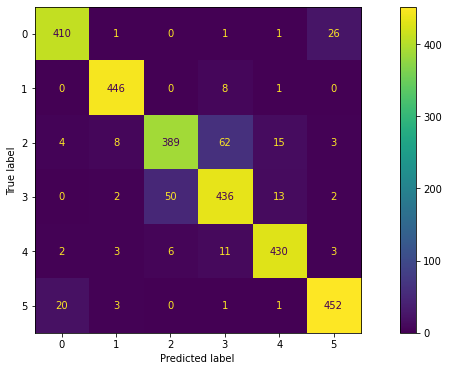

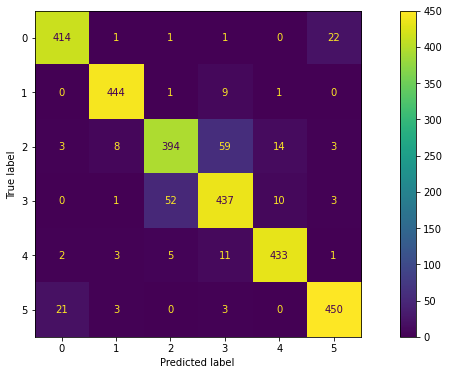

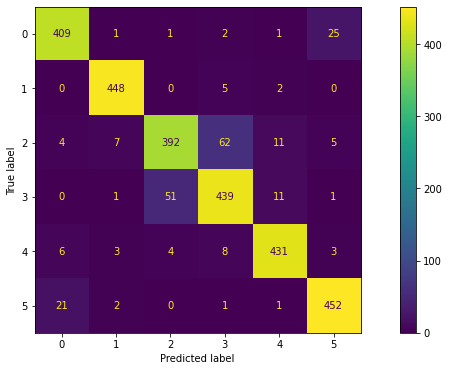

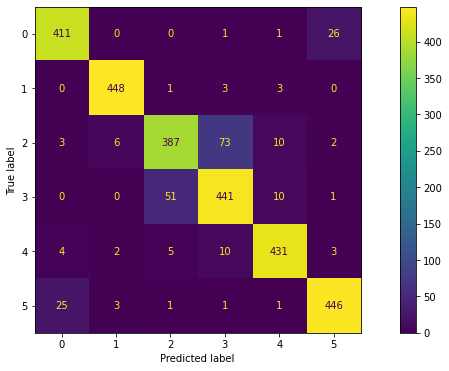

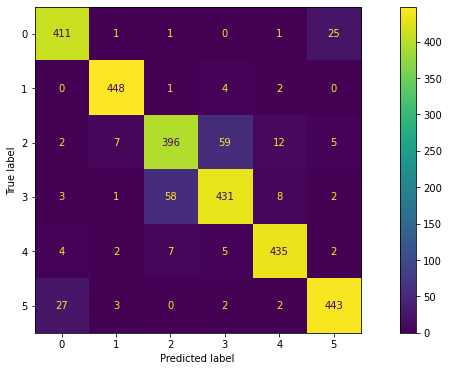

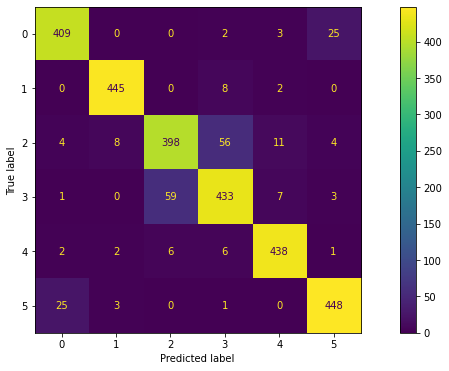

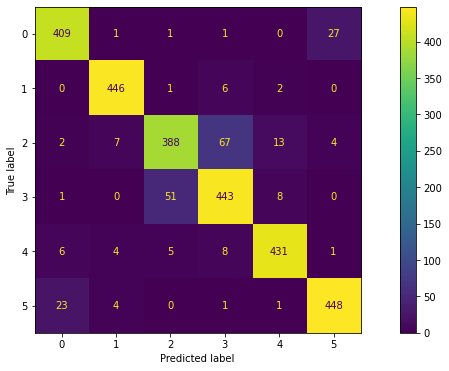

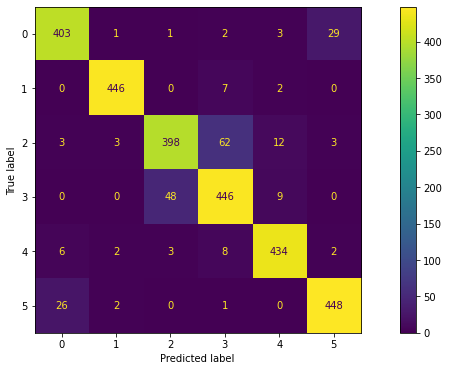

In [ ]:
early_stopper = EarlyStopper(patience=3)
optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)
train_nn(model, train_dataloader, val_dataloader, optimizer, early_stopper)

nn. vs F.
conv2d
cross_entropy